# 캐글 따라하기
## 서울 공기 오염 예측하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load Dataset
train = pd.read_csv("SeoulHourlyAvgAirPollution.csv")

In [3]:
train.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [4]:
#Wrangling Dataset(Korean->English)
train.rename(columns={'측정일시':'Date/Time','측정소명':'Location','이산화질소농도(ppm)':'NO2', '오존농도(ppm)':'O3','일산화탄소농도(ppm)':'CO','아황산가스(ppm)':'SO2','미세먼지(㎍/㎥)':'Fine Dust','초미세먼지(㎍/㎥)':'Ultrafine Dust'}, inplace=True)
train.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [5]:
train["Location"].value_counts()

관악구     169
도봉구     169
강북구     169
중랑구     169
강동구     169
광진구     169
동대문구    169
송파구     169
구로구     169
용산구     169
성동구     169
은평구     169
서대문구    169
영등포구    169
종로구     169
강남구     169
마포구     169
중구      169
동작구     169
강서구     169
양천구     169
서초구     169
노원구     169
금천구     169
성북구     169
Name: Location, dtype: int64

In [6]:
train["Date/Time"] = train["Date/Time"] // 100
train["Hour"] = train["Date/Time"] % 100
train["Hour"].head()

0    23
1    22
2    21
3    20
4    19
Name: Hour, dtype: int64

In [7]:
train["Date/Time"] = train["Date/Time"] // 100
train["Date"] = train["Date/Time"] % 100
train["Date"].head()

0    24
1    24
2    24
3    24
4    24
Name: Date, dtype: int64

In [8]:
train["Date/Time"] = train["Date/Time"] // 100
train["Month"] = train["Date/Time"] % 100
train["Month"].head()

0    11
1    11
2    11
3    11
4    11
Name: Month, dtype: int64

In [9]:
train["Date/Time"] = train["Date/Time"] // 100
train["Year"] = train["Date/Time"]
train["Year"].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Year, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6E7725C88>,
      dtype=object)

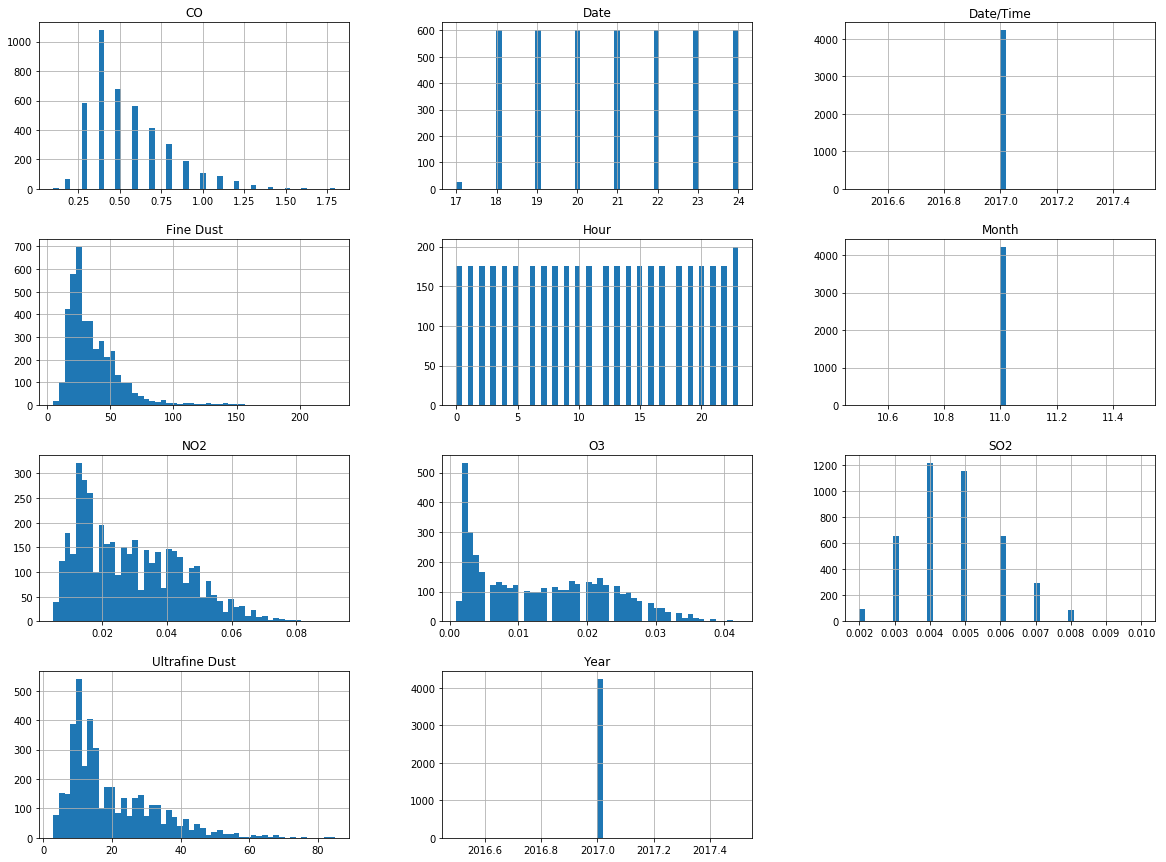

In [10]:
#EDA(visualization) - exploratory data analysis 탐색적 데이터 분석
%matplotlib inline

import seaborn as sns # 그래프 라이브러리
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

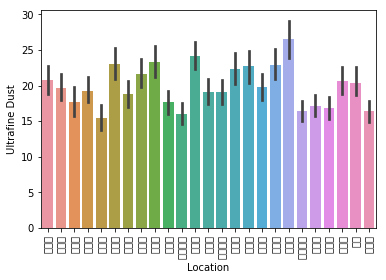

In [11]:
g = sns.barplot(x="Location", y="Ultrafine Dust", data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

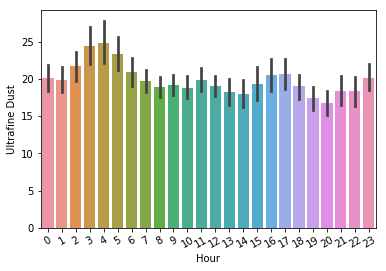

In [12]:
g = sns.barplot(x="Hour", y="Ultrafine Dust", data=train)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

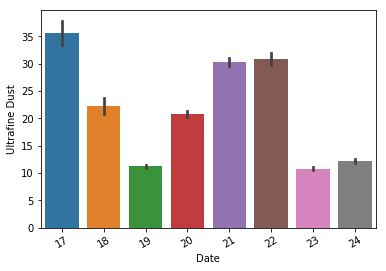

In [13]:
g = sns.barplot(x="Date", y="Ultrafine Dust", data=train)
plt.xticks(rotation=30)

In [24]:
# Split Train and Test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=2018)

In [25]:
train_set.head()

,Date/Time,Location,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust,Hour,Date,Month,Year
1645,2017,도봉구,0.017,0.024,0.5,0.003,25.0,11.0,19,19,11,2017
710,2017,관악구,0.011,0.023,0.3,0.007,21.0,6.0,13,23,11,2017
3022,2017,송파구,0.017,0.023,0.3,0.004,39.0,14.0,18,18,11,2017
97,2017,강남구,0.053,0.002,0.7,0.005,50.0,33.0,22,20,11,2017
2913,2017,송파구,0.035,0.003,0.6,0.004,27.0,14.0,7,23,11,2017


In [26]:
#Check the corr_matrix
corr_matrix = train_set.corr()

In [27]:
corr_matrix["Ultrafine Dust"].sort_values(ascending=False)

Ultrafine Dust    1.000000
Fine Dust         0.744817
CO                0.511139
NO2               0.449056
SO2               0.163276
Hour             -0.095661
Date             -0.136395
O3               -0.246298
Date/Time              NaN
Month                  NaN
Year                   NaN
Name: Ultrafine Dust, dtype: float64

In [28]:
# Check the dataset again
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3380 entries, 1645 to 1274
Data columns (total 12 columns):
Date/Time         3380 non-null int64
Location          3380 non-null object
NO2               3350 non-null float64
O3                3348 non-null float64
CO                3346 non-null float64
SO2               3350 non-null float64
Fine Dust         3333 non-null float64
Ultrafine Dust    3332 non-null float64
Hour              3380 non-null int64
Date              3380 non-null int64
Month             3380 non-null int64
Year              3380 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 343.3+ KB


In [29]:
# Remove the null data because the number of null data is too small
train_set.dropna(axis=0, inplace=True)
test_set.dropna(axis=0, inplace=True)

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 1645 to 1274
Data columns (total 12 columns):
Date/Time         3295 non-null int64
Location          3295 non-null object
NO2               3295 non-null float64
O3                3295 non-null float64
CO                3295 non-null float64
SO2               3295 non-null float64
Fine Dust         3295 non-null float64
Ultrafine Dust    3295 non-null float64
Hour              3295 non-null int64
Date              3295 non-null int64
Month             3295 non-null int64
Year              3295 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 334.6+ KB


In [31]:
train_set["Dongdaemun"] = False
train_set.loc[train_set["Location"]=='Dongdaemun', "Dongdaemun"] = True
train_set["Songpa"] = False
train_set.loc[train_set["Location"]=='Songpa', "Songpa"] = True
train_set["Gwanak"] = False
train_set.loc[train_set["Location"]=='Gwanak', "Gwanak"] = True
train_set["Yangcheon"] = False
train_set.loc[train_set["Location"]=='Yangcheon', "Yangcheon"] = True
train_set["Gangnam"] = False
train_set.loc[train_set["Location"]=='Gangnam', "Gangnam"] = True
train_set["Dongjak"] = False
train_set.loc[train_set["Location"]=='Dongjak', "Dongjak"] = True
train_set["Geumcheon"] = False
train_set.loc[train_set["Location"]=='Geumcheon', "Geumcheon"] = True
train_set["Seocho"] = False
train_set.loc[train_set["Location"]=='Seocho', "Seocho"] = True
train_set["Yeongdeungpo"] = False
train_set.loc[train_set["Location"]=='Yeongdeungpo', "Yeongdeungpo"] = True
train_set["Gwangjin"] = False
train_set.loc[train_set["Location"]=='Gwangjin', "Gwangjin"] = True
train_set["Gangdong"] = False
train_set.loc[train_set["Location"]=='Gangdong', "Gangdong"] = True
train_set["Seongbuk"] = False
train_set.loc[train_set["Location"]=='Seongbuk', "Seongbuk"] = True
train_set["Jungnan"] = False
train_set.loc[train_set["Location"]=='Jungnan', "Jungnan"] = True
train_set["Gangbuk"] = False
train_set.loc[train_set["Location"]=='Gangbuk', "Gangbuk"] = True
train_set["Dobong"] = False
train_set.loc[train_set["Location"]=='Dobong', "Dobong"] = True
train_set["Guro"] = False
train_set.loc[train_set["Location"]=='Guro', "Guro"] = True
train_set["Nowon"] = False
train_set.loc[train_set["Location"]=='Nowon', "Nowon"] = True
train_set["Nowon"] = False
train_set.loc[train_set["Location"]=='Nowon', "Nowon"] = True
train_set["Gangseo"] = False
train_set.loc[train_set["Location"]=='Gangseo', "Gangseo"] = True
train_set["Yongsan"] = False
train_set.loc[train_set["Location"]=='Yongsan', "Yongsan"] = True
train_set["Yongsan"] = False
train_set.loc[train_set["Location"]=='Yongsan', "Yongsan"] = True
train_set["Sungdong"] = False
train_set.loc[train_set["Location"]=='Sungdong', "Sungdong"] = True
train_set["Jung"] = False
train_set.loc[train_set["Location"]=='Jung', "Jung"] = True
train_set["Jung"] = False
train_set.loc[train_set["Location"]=='Jung', "Jung"] = True
train_set["Eunpeung"] = False
train_set.loc[train_set["Location"]=='Eunpeung', "Eunpeung"] = True
train_set["Seodaemun"] = False
train_set.loc[train_set["Location"]=='Seodaemun', "Seodaemun"] = True
train_set["Jonro"] = False
train_set.loc[train_set["Location"]=='Jonro', "Jonro"] = True
train_set["Mapo"] = False
train_set.loc[train_set["Location"]=='Mapo', "Mapo"] = True

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wtime\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [32]:
test_set["Dongdaemun"] = False
test_set.loc[test_set["Location"]=='Dongdaemun', "Dongdaemun"] = True
test_set["Songpa"] = False
test_set.loc[test_set["Location"]=='Songpa', "Songpa"] = True
test_set["Gwanak"] = False
test_set.loc[test_set["Location"]=='Gwanak', "Gwanak"] = True
test_set["Yangcheon"] = False
test_set.loc[test_set["Location"]=='Yangcheon', "Yangcheon"] = True
test_set["Gangnam"] = False
test_set.loc[test_set["Location"]=='Gangnam', "Gangnam"] = True
test_set["Dongjak"] = False
test_set.loc[test_set["Location"]=='Dongjak', "Dongjak"] = True
test_set["Geumcheon"] = False
test_set.loc[test_set["Location"]=='Geumcheon', "Geumcheon"] = True
test_set["Seocho"] = False
test_set.loc[test_set["Location"]=='Seocho', "Seocho"] = True
test_set["Yeongdeungpo"] = False
test_set.loc[test_set["Location"]=='Yeongdeungpo', "Yeongdeungpo"] = True
test_set["Gwangjin"] = False
test_set.loc[test_set["Location"]=='Gwangjin', "Gwangjin"] = True
test_set["Gangdong"] = False
test_set.loc[test_set["Location"]=='Gangdong', "Gangdong"] = True
test_set["Seongbuk"] = False
test_set.loc[test_set["Location"]=='Seongbuk', "Seongbuk"] = True
test_set["Jungnan"] = False
test_set.loc[test_set["Location"]=='Jungnan', "Jungnan"] = True
test_set["Gangbuk"] = False
test_set.loc[test_set["Location"]=='Gangbuk', "Gangbuk"] = True
test_set["Dobong"] = False
test_set.loc[test_set["Location"]=='Dobong', "Dobong"] = True
test_set["Guro"] = False
test_set.loc[test_set["Location"]=='Guro', "Guro"] = True
test_set["Nowon"] = False
test_set.loc[test_set["Location"]=='Nowon', "Nowon"] = True
test_set["Nowon"] = False
test_set.loc[test_set["Location"]=='Nowon', "Nowon"] = True
test_set["Gangseo"] = False
test_set.loc[test_set["Location"]=='Gangseo', "Gangseo"] = True
test_set["Yongsan"] = False
test_set.loc[test_set["Location"]=='Yongsan', "Yongsan"] = True
test_set["Yongsan"] = False
test_set.loc[test_set["Location"]=='Yongsan', "Yongsan"] = True
test_set["Sungdong"] = False
test_set.loc[test_set["Location"]=='Sungdong', "Sungdong"] = True
test_set["Jung"] = False
test_set.loc[test_set["Location"]=='Jung', "Jung"] = True
test_set["Jung"] = False
test_set.loc[test_set["Location"]=='Jung', "Jung"] = True
test_set["Eunpeung"] = False
test_set.loc[test_set["Location"]=='Eunpeung', "Eunpeung"] = True
test_set["Seodaemun"] = False
test_set.loc[test_set["Location"]=='Seodaemun', "Seodaemun"] = True
test_set["Jonro"] = False
test_set.loc[test_set["Location"]=='Jonro', "Jonro"] = True
test_set["Mapo"] = False
test_set.loc[test_set["Location"]=='Mapo', "Mapo"] = True

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [33]:
# Train & Evaluation
feature_names = ["NO2", "O3", "CO", "SO2", "Hour", 'Dongdaemun','Songpa','Gwanak','Yangcheon','Gangnam','Dongjak','Geumcheon','Seocho', 'Yeongdeungpo','Gwangjin', 'Gangdong', 'Seongbuk', 'Jungnan', 'Gangbuk', 'Dobong', 'Guro', 'Nowon', 'Gangseo', 'Yongsan', 'Sungdong','Jung', 'Eunpeung', 'Seodaemun', 'Jonro', 'Mapo']
feature_names

['NO2',
 'O3',
 'CO',
 'SO2',
 'Hour',
 'Dongdaemun',
 'Songpa',
 'Gwanak',
 'Yangcheon',
 'Gangnam',
 'Dongjak',
 'Geumcheon',
 'Seocho',
 'Yeongdeungpo',
 'Gwangjin',
 'Gangdong',
 'Seongbuk',
 'Jungnan',
 'Gangbuk',
 'Dobong',
 'Guro',
 'Nowon',
 'Gangseo',
 'Yongsan',
 'Sungdong',
 'Jung',
 'Eunpeung',
 'Seodaemun',
 'Jonro',
 'Mapo']

In [34]:
Ultra_finedust = train_set["Ultrafine Dust"]
Fine_dust = train_set["Fine Dust"]
X_train = train_set[feature_names]
X_test = test_set[feature_names]

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# Machine Learning
import xgboost as xgb # anaconda prompt - pip install xgboost

In [38]:
# Modeling target Fine Dust
from sklearn.metrics import mean_squared_error
rmse = []

In [43]:
import numpy as np
#Linear Regression Model
model = LinearRegression()
model.fit(X_train, Fine_dust)
regr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(regr_prediction, test_set["Fine Dust"]))
rmse.append(result)
result

18.60500678145144

In [44]:
#KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, Fine_dust)
knr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(knr_prediction, test_set["Fine Dust"]))
rmse.append(result)
result

16.920202018996

In [45]:
dtrain = xgb.DMatrix(X_train, label=Fine_dust)
dtest = xgb.DMatrix(X_test)

C:\Users\wtime\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wtime\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [46]:
#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [47]:
xb = xgb.train(params, dtrain, num_rounds)

In [48]:
y_pred_xgb = xb.predict(dtest)
result = np.sqrt(mean_squared_error(y_pred_xgb, test_set["Fine Dust"]))
rmse.append(result)

In [49]:
result

16.08937146070419

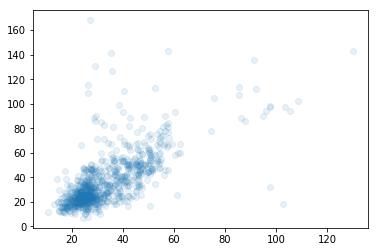

In [50]:
plt.scatter(y_pred_xgb, test_set["Fine Dust"], alpha=0.1, cmap=plt.get_cmap("jet"))

In [51]:
# Modeling target Ultra Fine Dust
rmse = []

In [52]:
#Linear Regression Model
model = LinearRegression()
model.fit(X_train, Ultra_finedust)
regr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(regr_prediction, test_set["Ultrafine Dust"]))
rmse.append(result)

In [53]:
#KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, Ultra_finedust)
knr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(knr_prediction, test_set["Ultrafine Dust"]))
rmse.append(result)

In [54]:
dtrain = xgb.DMatrix(X_train, label=Ultra_finedust)
dtest = xgb.DMatrix(X_test)

C:\Users\wtime\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wtime\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [55]:
#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [57]:
xb = xgb.train(params, dtrain, num_rounds)


In [58]:
y_pred_xgb = xb.predict(dtest)
result = np.sqrt(mean_squared_error(y_pred_xgb, test_set["Ultrafine Dust"]))
rmse.append(result)

In [59]:
rmse

[10.375706471209407, 9.211039489919065, 8.17837670001028]

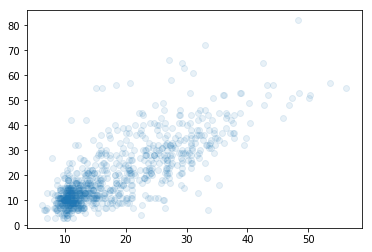

In [60]:
plt.scatter(y_pred_xgb, test_set["Ultrafine Dust"], alpha=0.1)